In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from river import evaluate
from river import metrics

from river import stream, compose, drift
from river import preprocessing
from river import optim
from river import linear_model as ln
%matplotlib inline

In [2]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")

In [3]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,3.039468,131.76000,6.00,64.00,0.779079,0.779079,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336561e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
1,3.725871,150.26087,6.00,64.00,0.748013,0.748013,0.0,0.0,1.0,0.0,...,0.000000,54.00,7.248921e+07,9.108696,10.392305,0.000000,0.000000,0.00,130.152174,1
2,0.000000,54.00000,6.00,64.00,0.626940,0.626940,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.306751e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
3,0.000000,54.00000,6.00,64.00,1.225593,1.225593,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334845e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
4,0.000000,54.00000,6.00,64.00,32.635278,32.635278,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309328e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336466,0.000000,54.00000,6.00,64.00,35.821106,35.821106,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303339e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
336467,0.000000,54.00000,6.00,64.00,49.731488,49.731488,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331430e+07,9.500000,10.392305,0.000000,0.000000,0.00,141.550000,1
336468,0.138592,23406.00000,17.00,64.00,3739.483049,3739.483049,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310228e+07,9.500000,10.000000,0.000000,0.000000,0.00,141.550000,1
336469,0.007363,58.62000,5.76,61.44,9.986720,9.986720,0.0,0.0,0.0,0.0,...,0.843745,54.91,8.333104e+07,9.500000,10.440779,1.197507,5.541035,0.22,141.550000,1


In [4]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 325946, 0: 10525})


In [5]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [6]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      27.53%   95.68%   42.76%      1550  
       1      99.85%   91.94%   95.73%     48450  
                                                  
   Macro      63.69%   93.81%   69.24%            
   Micro      92.06%   92.06%   92.06%            
Weighted      97.61%   92.06%   94.09%            

                 92.06% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      33.50%   94.91%   49.52%      3160  
       1      99.82%   93.85%   96.75%     96840  
                                                  
   Macro      66.66%   94.38%   73.13%            
   Micro      93.88%   93.88%   93.88%            
Weighted      97.73%   93.88%   95.25%            

                 93.88% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      46.78%   94.14%   62.50%     10525  
       1      99.80%   96.54%   98.15%    325946  
                                                  
   Macro      73.29%   95.34%   80.32%            
   Micro      96.47%   96.47%   96.47%            
Weighted      98.15%   96.47%   97.03%            

                 96.47% accuracy                  

In [7]:
dataset = stream.iter_pandas(X, y)

In [8]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('DDoS_CIC.png')
    plt.close()

    return fig

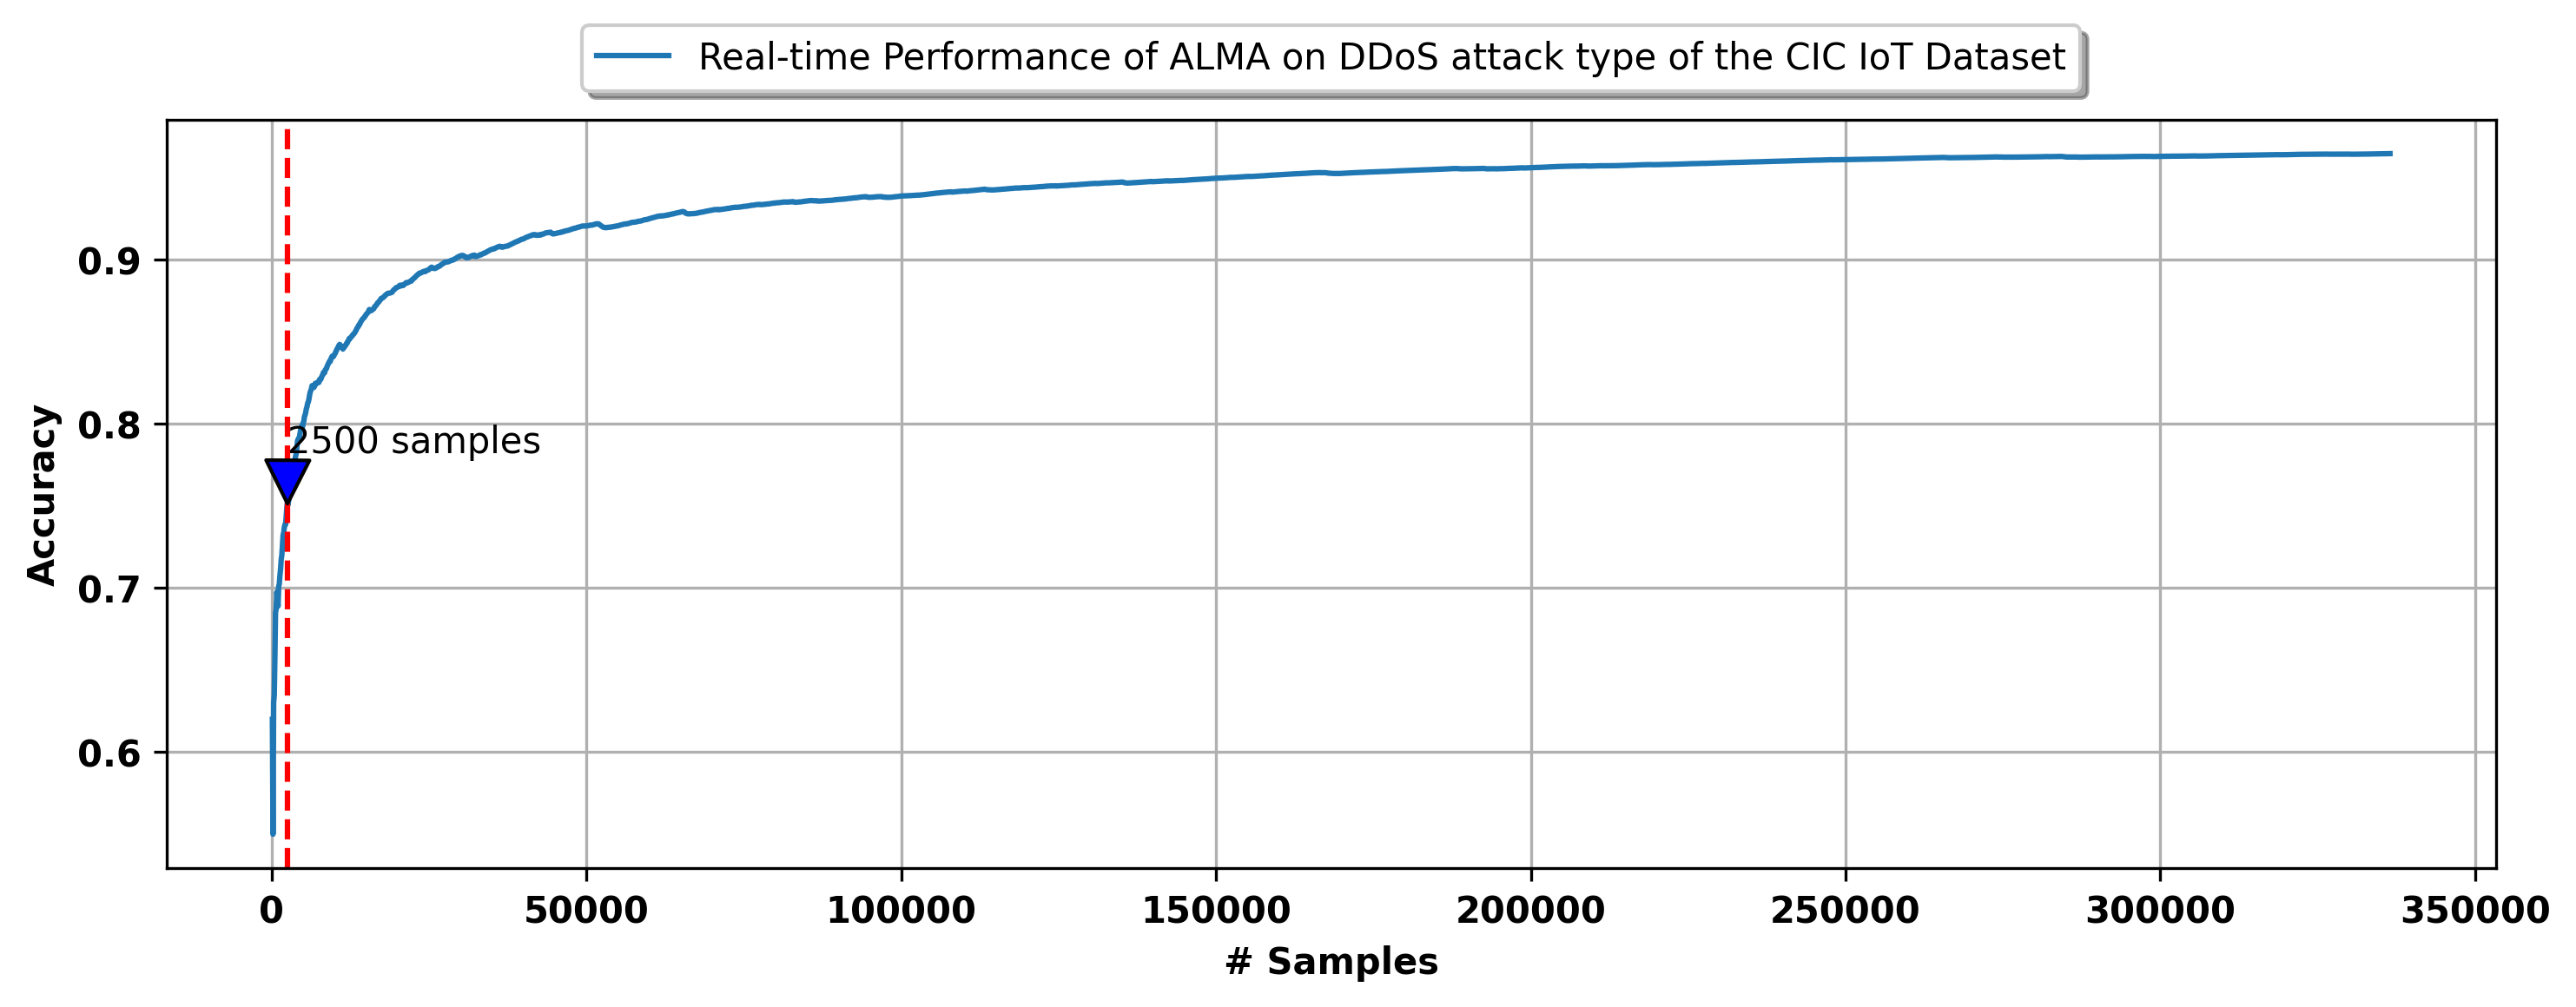

In [9]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on DDoS attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [10]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 77526, 0: 10525})


In [11]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [12]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      83.69%   95.47%   89.19%      5955  
       1      99.38%   97.48%   98.42%     44045  
                                                  
   Macro      91.53%   96.48%   93.81%            
   Micro      97.24%   97.24%   97.24%            
Weighted      97.51%   97.24%   97.32%            

                 97.24% accuracy                   – 00:00:05 – 18.75 KB
[88,051]            Precision   Recall   F1       Support  
                                                  
       0      85.81%   95.58%   90.44%     10525  
       1      99.39%   97.85%   98.62%     77526  
                                                  
   Macro      92.60%   96.72%   94.53%            
   Micro      97.58%   97.58%   97.58%            
Weighted      97.77%   97.58%   97.64%            

                 97.58% accuracy                   – 00:00:09 – 18.75 KB
CPU times: user 9.

           Precision   Recall   F1       Support  
                                                  
       0      85.81%   95.58%   90.44%     10525  
       1      99.39%   97.85%   98.62%     77526  
                                                  
   Macro      92.60%   96.72%   94.53%            
   Micro      97.58%   97.58%   97.58%            
Weighted      97.77%   97.58%   97.64%            

                 97.58% accuracy                  

In [13]:
dataset = stream.iter_pandas(X, y)

In [14]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('DoS_CIC.png')
    plt.close()

    return fig

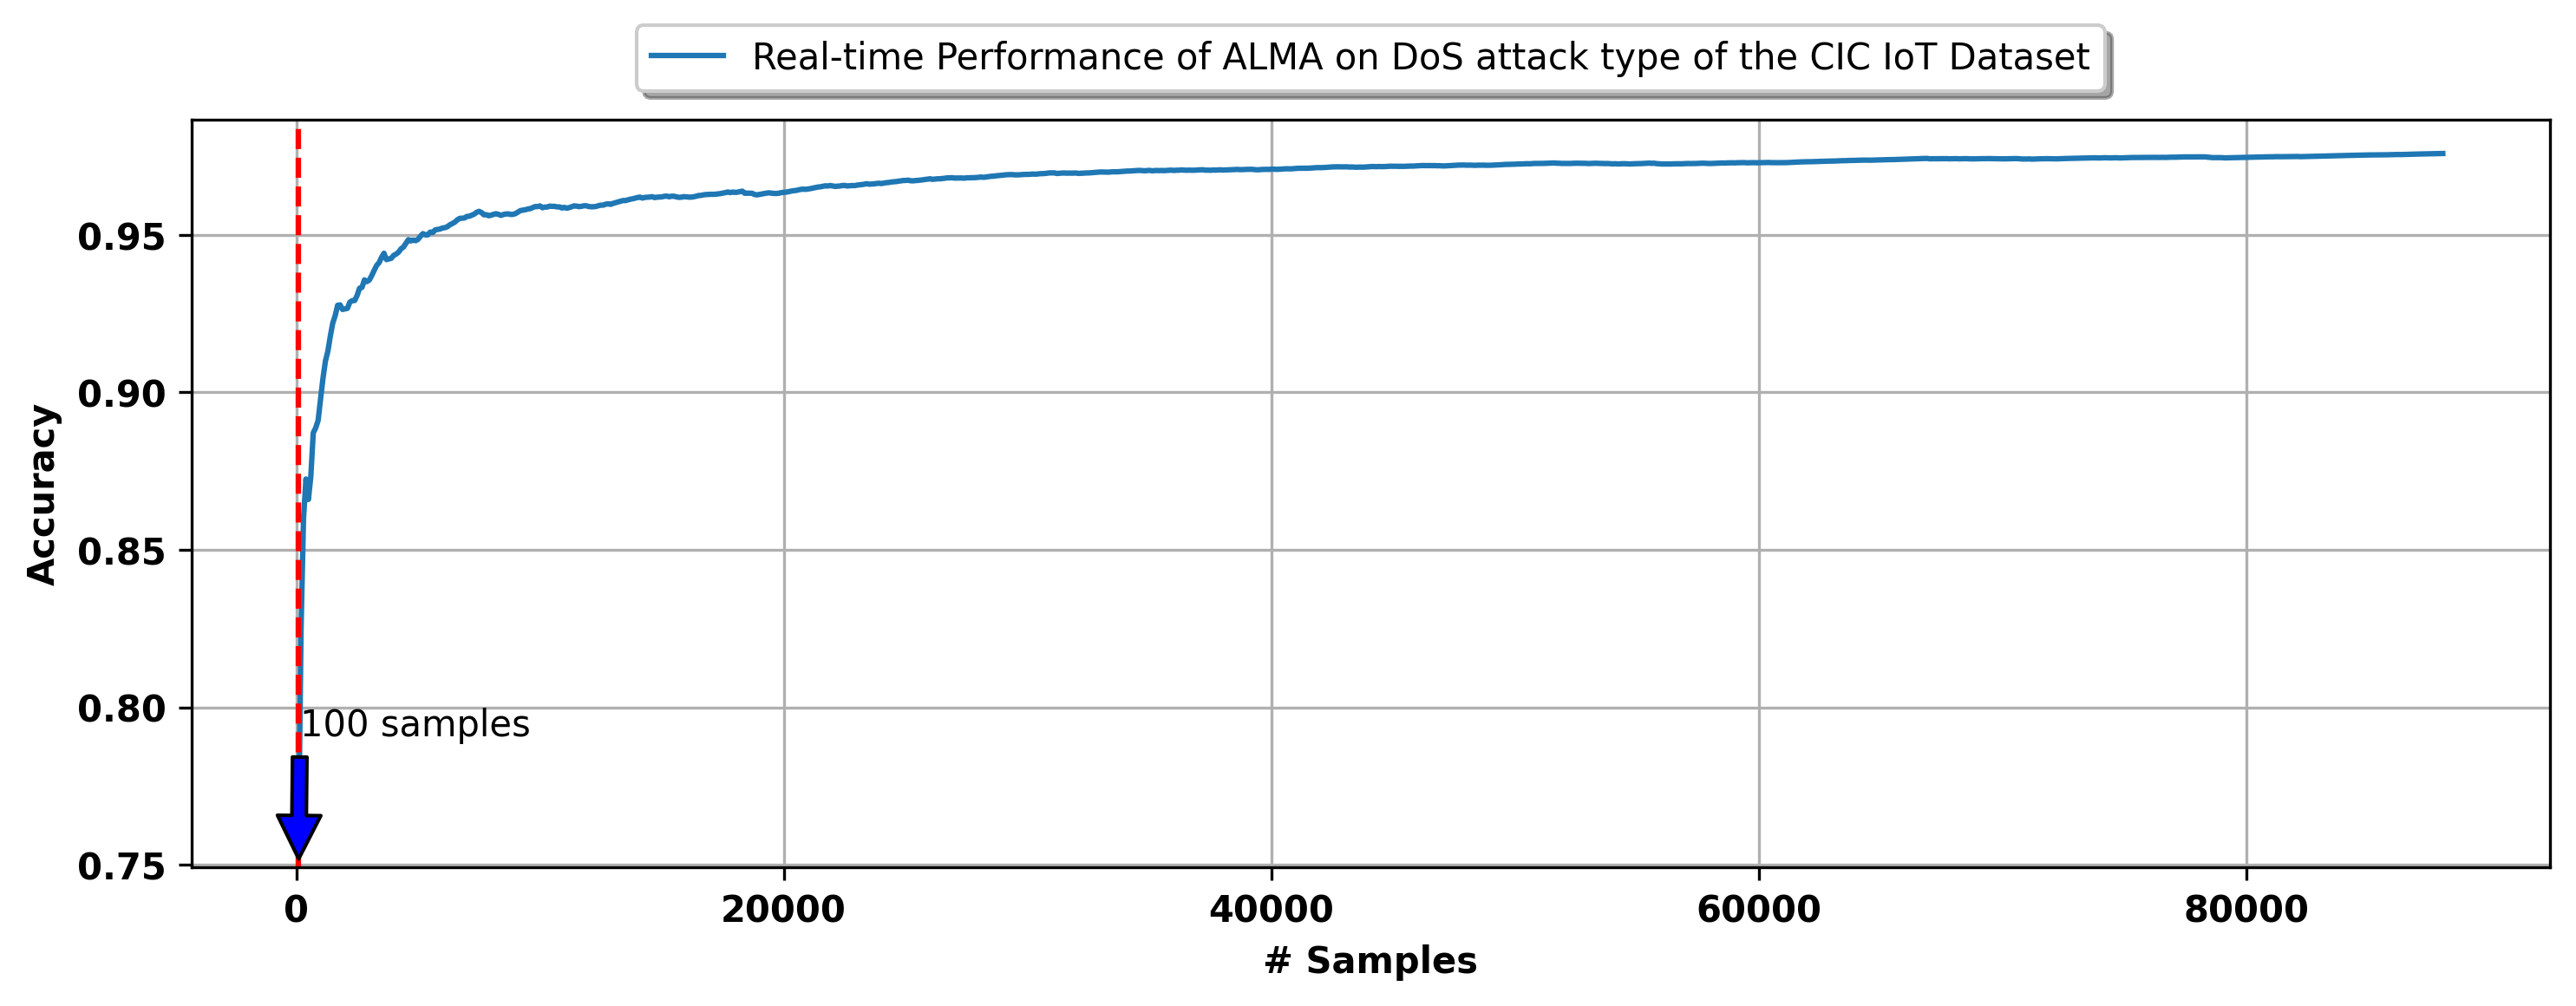

In [15]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on DoS attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [16]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({1: 25103, 0: 10525})


In [17]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [18]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

CPU times: user 3.94 s, sys: 5.09 ms, total: 3.94 s
Wall time: 3.95 s


           Precision   Recall   F1       Support  
                                                  
       0      97.46%   96.57%   97.01%     10525  
       1      98.57%   98.94%   98.76%     25103  
                                                  
   Macro      98.01%   97.76%   97.88%            
   Micro      98.24%   98.24%   98.24%            
Weighted      98.24%   98.24%   98.24%            

                 98.24% accuracy                  

In [19]:
dataset = stream.iter_pandas(X, y)

In [20]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Mirai_CIC.png')
    plt.close()

    return fig

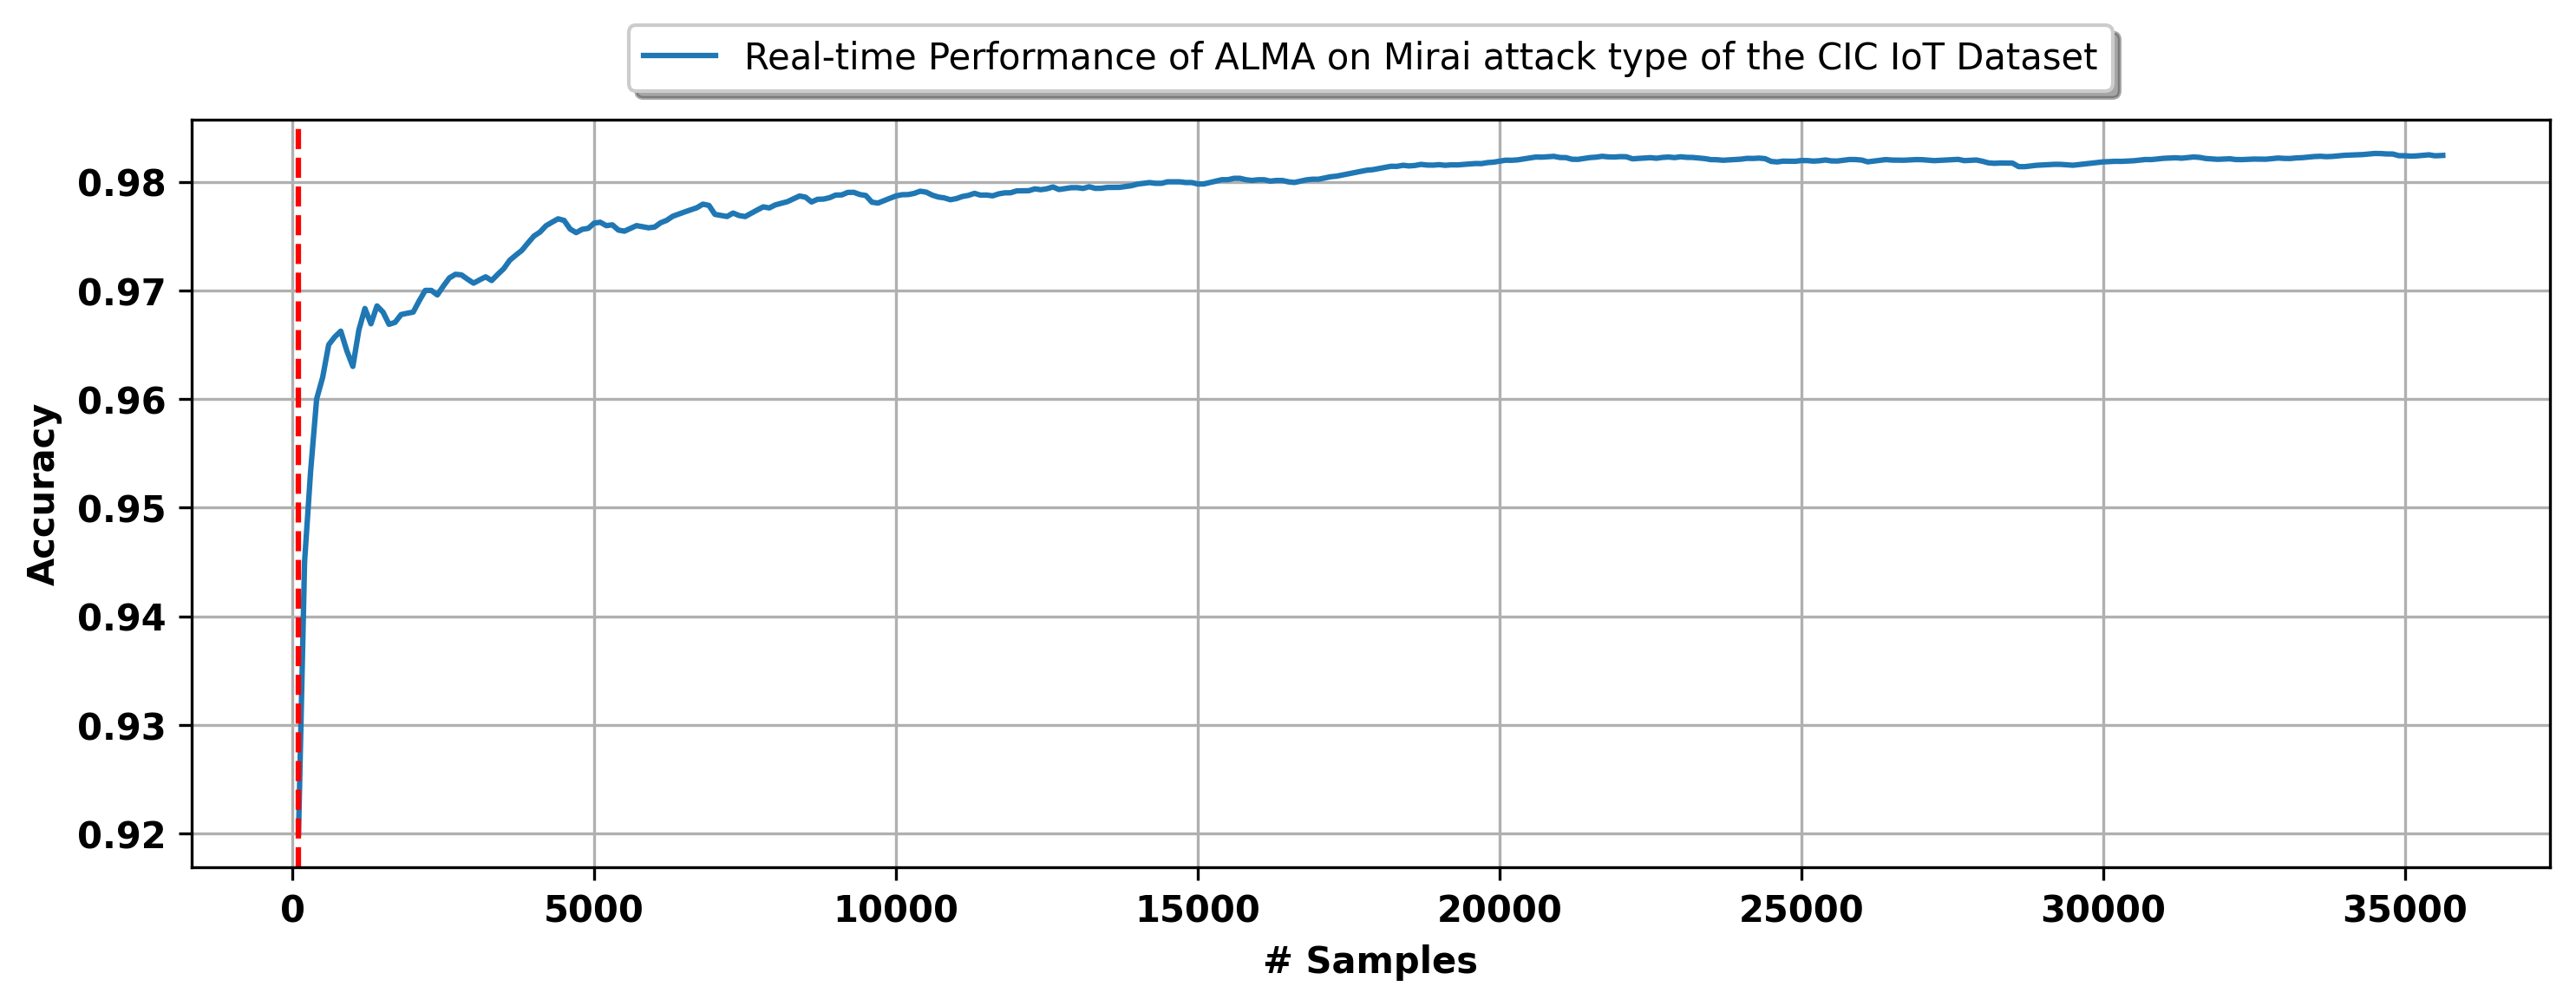

In [21]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Mirai attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [22]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({0: 10525, 1: 3410})


In [23]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [24]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

CPU times: user 1.61 s, sys: 15.2 ms, total: 1.62 s
Wall time: 1.61 s


           Precision   Recall   F1       Support  
                                                  
       0      86.90%   76.52%   81.38%     10525  
       1      47.05%   64.40%   54.38%      3410  
                                                  
   Macro      66.98%   70.46%   67.88%            
   Micro      73.56%   73.56%   73.56%            
Weighted      77.15%   73.56%   74.77%            

                 73.56% accuracy                  

In [25]:
dataset = stream.iter_pandas(X, y)

In [26]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Recon_CIC.png')
    plt.close()

    return fig

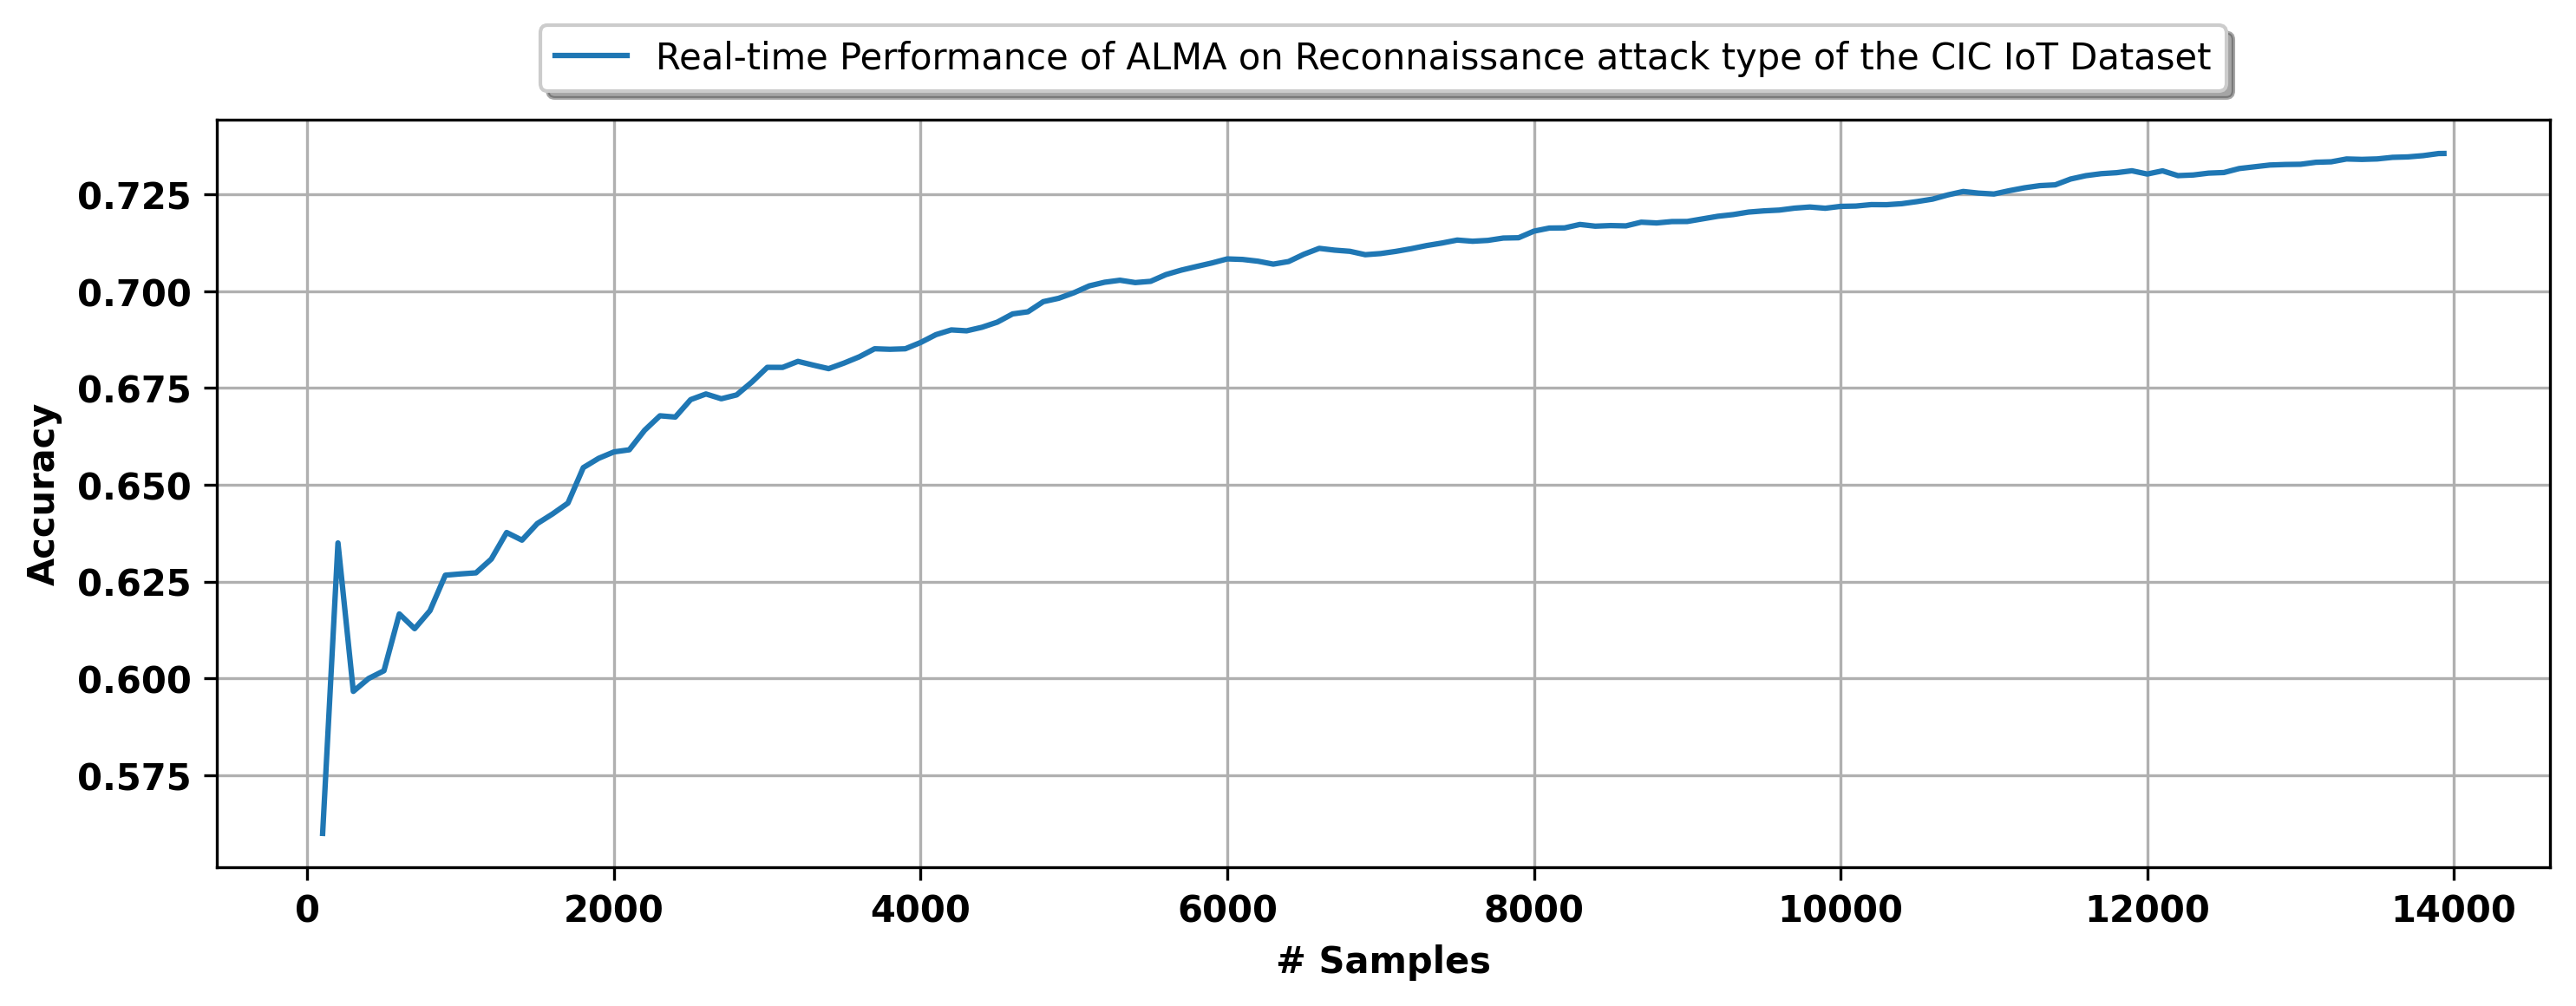

In [27]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Reconnaissance attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [28]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)
dataset = stream.iter_pandas(X, y)

Original dataset shape  Counter({0: 10525, 1: 4788})


In [29]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [30]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

CPU times: user 1.79 s, sys: 19.7 ms, total: 1.81 s
Wall time: 1.8 s


           Precision   Recall   F1       Support  
                                                  
       0      79.72%   68.67%   73.79%     10525  
       1      47.21%   61.59%   53.45%      4788  
                                                  
   Macro      63.47%   65.13%   63.62%            
   Micro      66.46%   66.46%   66.46%            
Weighted      69.55%   66.46%   67.43%            

                 66.46% accuracy                  

In [31]:
dataset = stream.iter_pandas(X, y)

In [32]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Spoofing_CIC.png')
    plt.close()

    return fig

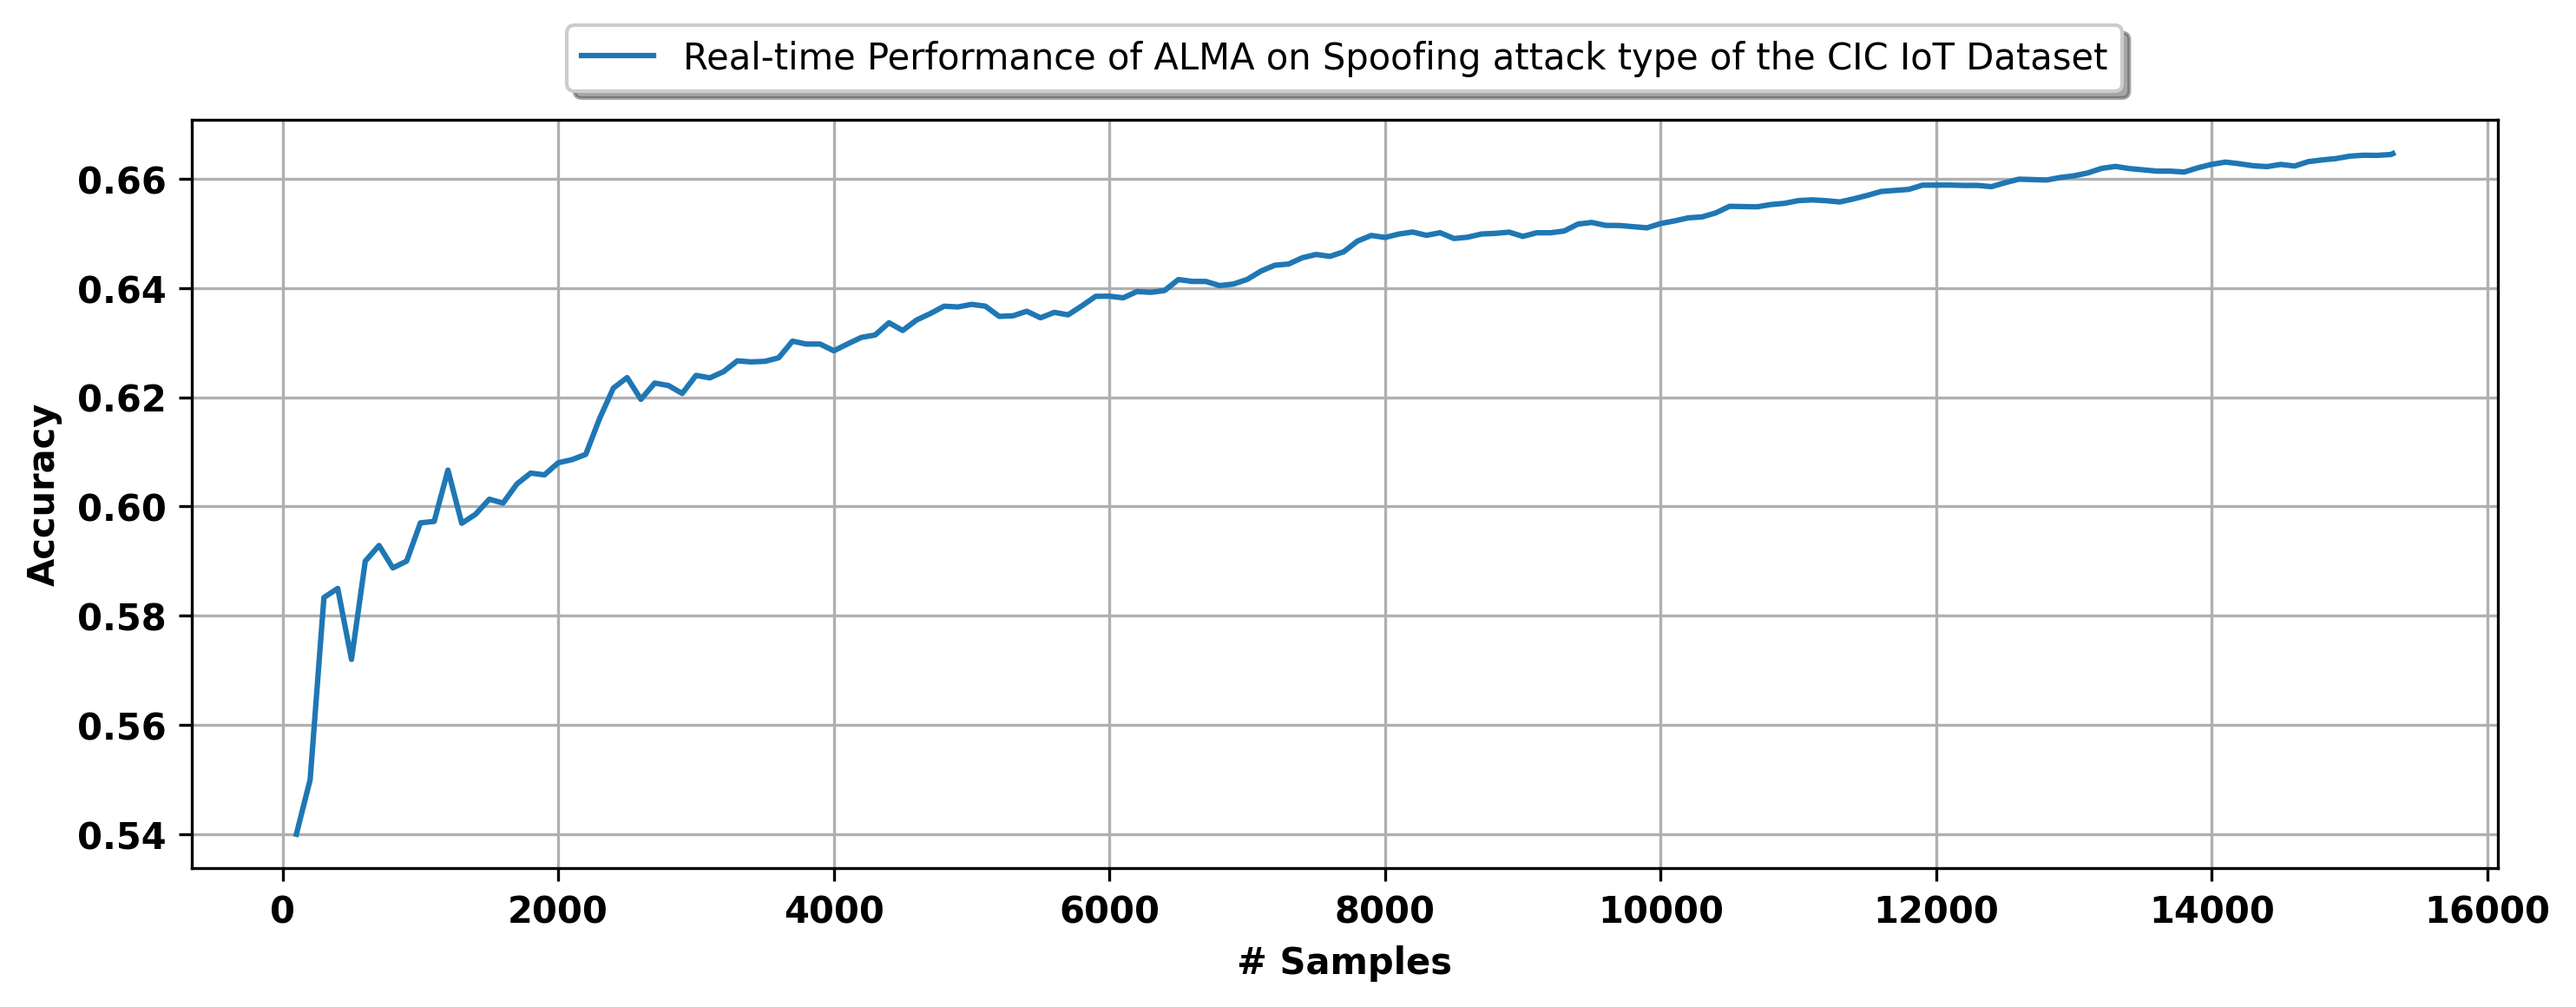

In [33]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on Spoofing attack type of the CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)

In [34]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [35]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [36]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      17.88%   93.47%   30.02%      1255  
       1      99.81%   88.95%   94.07%     48745  
                                                  
   Macro      58.85%   91.21%   62.05%            
   Micro      89.06%   89.06%   89.06%            
Weighted      97.75%   89.06%   92.46%            

                 89.06% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      22.90%   93.24%   36.77%      2560  
       1      99.81%   91.75%   95.61%     97440  
                                                  
   Macro      61.36%   92.50%   66.19%            
   Micro      91.79%   91.79%   91.79%            
Weighted      97.84%   91.79%   94.10%            

                 91.79% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      36.91%   91.67%   52.63%     10525  
       1      99.77%   95.91%   97.81%    403472  
                                                  
   Macro      68.34%   93.79%   75.22%            
   Micro      95.80%   95.80%   95.80%            
Weighted      98.18%   95.80%   96.66%            

                 95.80% accuracy                  

In [37]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [38]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [39]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      20.46%   95.70%   33.71%      1511  
       1      99.85%   88.41%   93.78%     48489  
                                                  
   Macro      60.15%   92.05%   63.74%            
   Micro      88.63%   88.63%   88.63%            
Weighted      97.45%   88.63%   91.96%            

                 88.63% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      24.25%   95.67%   38.69%      2864  
       1      99.86%   91.19%   95.33%     97136  
                                                  
   Macro      62.05%   93.43%   67.01%            
   Micro      91.32%   91.32%   91.32%            
Weighted      97.69%   91.32%   93.70%            

                 91.32% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      39.04%   94.48%   55.25%     10525  
       1      99.83%   95.58%   97.66%    351049  
                                                  
   Macro      69.43%   95.03%   76.45%            
   Micro      95.54%   95.54%   95.54%            
Weighted      98.06%   95.54%   96.42%            

                 95.54% accuracy                  

In [40]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [41]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [42]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      19.52%   88.25%   31.97%      1540  
       1      99.58%   88.44%   93.68%     48460  
                                                  
   Macro      59.55%   88.34%   62.82%            
   Micro      88.43%   88.43%   88.43%            
Weighted      97.11%   88.43%   91.78%            

                 88.43% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      22.14%   87.79%   35.37%      3031  
       1      99.58%   90.35%   94.74%     96969  
                                                  
   Macro      60.86%   89.07%   65.05%            
   Micro      90.27%   90.27%   90.27%            
Weighted      97.23%   90.27%   92.94%            

                 90.27% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      31.23%   86.18%   45.85%     10525  
       1      99.53%   93.94%   96.65%    329356  
                                                  
   Macro      65.38%   90.06%   71.25%            
   Micro      93.70%   93.70%   93.70%            
Weighted      97.42%   93.70%   95.08%            

                 93.70% accuracy                  

In [43]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [44]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [45]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=50000, show_time=True, show_memory=True)

[50,000]            Precision   Recall   F1       Support  
                                                  
       0      12.50%   84.82%   21.80%      1542  
       1      99.41%   81.11%   89.33%     48458  
                                                  
   Macro      55.96%   82.97%   55.57%            
   Micro      81.23%   81.23%   81.23%            
Weighted      96.73%   81.23%   87.25%            

                 81.23% accuracy                   – 00:00:05 – 18.75 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      12.51%   85.03%   21.80%      3026  
       1      99.43%   81.44%   89.54%     96974  
                                                  
   Macro      55.97%   83.23%   55.67%            
   Micro      81.55%   81.55%   81.55%            
Weighted      96.80%   81.55%   87.49%            

                 81.55% accuracy                   – 00:00:11 – 18.75 KB
[150,000]        

           Precision   Recall   F1       Support  
                                                  
       0      14.64%   86.50%   25.05%     10525  
       1      99.49%   83.95%   91.06%    330734  
                                                  
   Macro      57.07%   85.23%   58.05%            
   Micro      84.03%   84.03%   84.03%            
Weighted      96.87%   84.03%   89.03%            

                 84.03% accuracy                  

In [46]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [47]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [48]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      60.19%   96.55%   74.15%       985  
       1      99.60%   93.02%   96.20%      9015  
                                                  
   Macro      79.89%   94.79%   85.17%            
   Micro      93.37%   93.37%   93.37%            
Weighted      95.71%   93.37%   94.03%            

                 93.37% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      62.93%   95.82%   75.96%      1890  
       1      99.54%   94.11%   96.75%     18110  
                                                  
   Macro      81.23%   94.96%   86.36%            
   Micro      94.27%   94.27%   94.27%            
Weighted      96.08%   94.27%   94.78%            

                 94.27% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      74.96%   95.59%   84.03%     10525  
       1      99.53%   96.73%   98.11%    102629  
                                                  
   Macro      87.25%   96.16%   91.07%            
   Micro      96.62%   96.62%   96.62%            
Weighted      97.25%   96.62%   96.80%            

                 96.62% accuracy                  

In [49]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [50]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [51]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      57.59%   88.35%   69.73%      1142  
       1      98.39%   91.61%   94.88%      8858  
                                                  
   Macro      77.99%   89.98%   82.30%            
   Micro      91.24%   91.24%   91.24%            
Weighted      93.73%   91.24%   92.01%            

                 91.24% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      62.29%   88.48%   73.11%      2274  
       1      98.44%   93.13%   95.71%     17726  
                                                  
   Macro      80.36%   90.80%   84.41%            
   Micro      92.60%   92.60%   92.60%            
Weighted      94.33%   92.60%   93.14%            

                 92.60% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      68.77%   87.23%   76.91%     10525  
       1      98.28%   94.85%   96.53%     80936  
                                                  
   Macro      83.52%   91.04%   86.72%            
   Micro      93.97%   93.97%   93.97%            
Weighted      94.88%   93.97%   94.27%            

                 93.97% accuracy                  

In [52]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Dos_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [53]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [54]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      37.68%   83.39%   51.91%      1102  
       1      97.58%   82.92%   89.65%      8898  
                                                  
   Macro      67.63%   83.16%   70.78%            
   Micro      82.97%   82.97%   82.97%            
Weighted      90.98%   82.97%   85.49%            

                 82.97% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      39.20%   84.48%   53.55%      2236  
       1      97.71%   83.51%   90.05%     17764  
                                                  
   Macro      68.46%   83.99%   71.80%            
   Micro      83.61%   83.61%   83.61%            
Weighted      91.17%   83.61%   85.97%            

                 83.61% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      42.66%   86.03%   57.03%     10525  
       1      97.95%   85.21%   91.14%     82314  
                                                  
   Macro      70.30%   85.62%   74.09%            
   Micro      85.30%   85.30%   85.30%            
Weighted      91.68%   85.30%   87.27%            

                 85.30% accuracy                  

In [55]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [56]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [57]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      79.12%   85.83%   82.34%      2732  
       1      94.50%   91.48%   92.97%      7268  
                                                  
   Macro      86.81%   88.66%   87.65%            
   Micro      89.94%   89.94%   89.94%            
Weighted      90.30%   89.94%   90.06%            

                 89.94% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      80.41%   85.88%   83.06%      5425  
       1      94.61%   92.21%   93.39%     14575  
                                                  
   Macro      87.51%   89.05%   88.23%            
   Micro      90.50%   90.50%   90.50%            
Weighted      90.76%   90.50%   90.59%            

                 90.50% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      81.79%   86.22%   83.95%     10525  
       1      94.81%   92.92%   93.85%     28513  
                                                  
   Macro      88.30%   89.57%   88.90%            
   Micro      91.11%   91.11%   91.11%            
Weighted      91.30%   91.11%   91.18%            

                 91.11% accuracy                  

In [58]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [59]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [60]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      67.14%   81.30%   73.54%      2631  
       1      92.78%   85.79%   89.15%      7369  
                                                  
   Macro      79.96%   83.55%   81.35%            
   Micro      84.61%   84.61%   84.61%            
Weighted      86.03%   84.61%   85.04%            

                 84.61% accuracy                   – 00:00:01 – 18.75 KB
[20,000]            Precision   Recall   F1       Support  
                                                  
       0      68.46%   82.43%   74.80%      5253  
       1      93.25%   86.47%   89.73%     14747  
                                                  
   Macro      80.85%   84.45%   82.27%            
   Micro      85.41%   85.41%   85.41%            
Weighted      86.74%   85.41%   85.81%            

                 85.41% accuracy                   – 00:00:02 – 18.75 KB
[30,000]          

           Precision   Recall   F1       Support  
                                                  
       0      68.74%   82.69%   75.07%     10525  
       1      93.44%   86.76%   89.97%     29891  
                                                  
   Macro      81.09%   84.72%   82.52%            
   Micro      85.70%   85.70%   85.70%            
Weighted      87.00%   85.70%   86.09%            

                 85.70% accuracy                  

In [61]:
#Loading the dataset
df = pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Benign_Only.csv")
df1= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Only.csv")
df2= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Only.csv")
X = df.drop(['label'], axis=1)
y = df['label']
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']
X3 = pd.concat([X, X1, X2])
y3 = pd.concat([y, y1, y2])
X3, y3 = shuffle(X3, y3, random_state=42)
dataset = stream.iter_pandas(X3, y3)

In [62]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [63]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=10000, show_time=True, show_memory=True)

[10,000]            Precision   Recall   F1       Support  
                                                  
       0      68.29%   68.75%   68.52%      5658  
       1      58.92%   58.41%   58.66%      4342  
                                                  
   Macro      63.61%   63.58%   63.59%            
   Micro      64.26%   64.26%   64.26%            
Weighted      64.22%   64.26%   64.24%            

                 64.26% accuracy                   – 00:00:01 – 18.75 KB
[18,723]            Precision   Recall   F1       Support  
                                                  
       0      68.58%   70.93%   69.73%     10525  
       1      60.96%   58.28%   59.59%      8198  
                                                  
   Macro      64.77%   64.60%   64.66%            
   Micro      65.39%   65.39%   65.39%            
Weighted      65.24%   65.39%   65.29%            

                 65.39% accuracy                   – 00:00:02 – 18.75 KB
CPU times: user 2.

           Precision   Recall   F1       Support  
                                                  
       0      68.58%   70.93%   69.73%     10525  
       1      60.96%   58.28%   59.59%      8198  
                                                  
   Macro      64.77%   64.60%   64.66%            
   Micro      65.39%   65.39%   65.39%            
Weighted      65.24%   65.39%   65.29%            

                 65.39% accuracy                  

In [64]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DDoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 325946, 0: 10525})


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [66]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      13.11%   92.86%   22.97%       168  
       1      99.69%   78.60%   87.90%      4832  
                                                  
   Macro      56.40%   85.73%   55.44%            
   Micro      79.08%   79.08%   79.08%            
Weighted      96.78%   79.08%   85.71%            

                 79.08% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      15.07%   91.95%   25.89%       323  
       1      99.68%   82.70%   90.40%      9677  
                                                  
   Macro      57.37%   87.33%   58.15%            
   Micro      83.00%   83.00%   83.00%            
Weighted      96.94%   83.00%   88.32%            

                 83.00% accuracy                   – 00:00:01 – 18.75 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      18.92%   94.08%   31.51%       574  
       1      99.76%   85.76%   92.23%     16249  
                                                  
   Macro      59.34%   89.92%   61.87%            
   Micro      86.04%   86.04%   86.04%            
Weighted      97.00%   86.04%   90.16%            

                 86.04% accuracy                  

In [67]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.9677551556712384
Precision: 0.998508088955196
Recall: 0.9681656586922056
F1_Score: 0.9831028077831677


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [69]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      12.25%   90.62%   21.58%       160  
       1      99.61%   78.53%   87.82%      4840  
                                                  
   Macro      55.93%   84.58%   54.70%            
   Micro      78.92%   78.92%   78.92%            
Weighted      96.81%   78.92%   85.70%            

                 78.92% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      13.72%   92.00%   23.89%       300  
       1      99.70%   82.11%   90.06%      9700  
                                                  
   Macro      56.71%   87.06%   56.97%            
   Micro      82.41%   82.41%   82.41%            
Weighted      97.12%   82.41%   88.07%            

                 82.41% accuracy                   – 00:00:01 – 18.75 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      22.55%   92.91%   36.29%      1086  
       1      99.74%   89.36%   94.26%     32561  
                                                  
   Macro      61.14%   91.13%   65.28%            
   Micro      89.47%   89.47%   89.47%            
Weighted      97.24%   89.47%   92.39%            

                 89.47% accuracy                  

In [70]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.9878312154915067
Precision: 0.9987329394427688
Recall: 0.9886940368457828
F1_Score: 0.9936881338629477


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [72]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      12.69%   91.93%   22.31%       161  
       1      99.66%   78.96%   88.11%      4839  
                                                  
   Macro      56.18%   85.44%   55.21%            
   Micro      79.38%   79.38%   79.38%            
Weighted      96.86%   79.38%   85.99%            

                 79.38% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      14.05%   92.41%   24.39%       316  
       1      99.70%   81.56%   89.72%      9684  
                                                  
   Macro      56.87%   86.98%   57.06%            
   Micro      81.90%   81.90%   81.90%            
Weighted      96.99%   81.90%   87.66%            

                 81.90% accuracy                   – 00:00:01 – 18.75 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0      27.51%   93.83%   42.54%      1604  
       1      99.78%   91.88%   95.67%     48866  
                                                  
   Macro      63.64%   92.86%   69.11%            
   Micro      91.95%   91.95%   91.95%            
Weighted      97.48%   91.95%   93.98%            

                 91.95% accuracy                  

In [73]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9603987398645459
Precision: 0.9992710658220048
Recall: 0.9598238775804822
F1_Score: 0.9791503289631127


In [74]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_DoS_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 77526, 0: 10525})


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [76]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 507 ms, sys: 4.42 ms, total: 511 ms
Wall time: 520 ms


           Precision   Recall   F1       Support  
                                                  
       0      66.76%   95.16%   78.47%       517  
       1      99.32%   93.69%   96.42%      3885  
                                                  
   Macro      83.04%   94.43%   87.45%            
   Micro      93.87%   93.87%   93.87%            
Weighted      95.49%   93.87%   94.32%            

                 93.87% accuracy                  

In [77]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.9821277002713721
Precision: 0.9936637836654258
Recall: 0.9859860675438954
F1_Score: 0.9898100372836762


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [79]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      70.67%   96.32%   81.53%       598  
       1      99.47%   94.57%   96.96%      4402  
                                                  
   Macro      85.07%   95.45%   89.24%            
   Micro      94.78%   94.78%   94.78%            
Weighted      96.03%   94.78%   95.11%            

                 94.78% accuracy                   – 00:00:00 – 18.75 KB
[8,805]            Precision   Recall   F1       Support  
                                                  
       0      72.88%   95.25%   82.58%      1010  
       1      99.36%   95.41%   97.34%      7795  
                                                  
   Macro      86.12%   95.33%   89.96%            
   Micro      95.39%   95.39%   95.39%            
Weighted      96.32%   95.39%   95.65%            

                 95.39% accuracy                   – 00:00:00 – 18.75 KB
CPU times: user 988 

           Precision   Recall   F1       Support  
                                                  
       0      72.88%   95.25%   82.58%      1010  
       1      99.36%   95.41%   97.34%      7795  
                                                  
   Macro      86.12%   95.33%   89.96%            
   Micro      95.39%   95.39%   95.39%            
Weighted      96.32%   95.39%   95.65%            

                 95.39% accuracy                  

In [80]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.9797466118163692
Precision: 0.9971394378119618
Recall: 0.9797937789505385
F1_Score: 0.988390512770436


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [82]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      65.75%   96.67%   78.27%       570  
       1      99.54%   93.52%   96.44%      4430  
                                                  
   Macro      82.65%   95.09%   87.35%            
   Micro      93.88%   93.88%   93.88%            
Weighted      95.69%   93.88%   94.37%            

                 93.88% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0      71.99%   96.21%   82.36%      1162  
       1      99.48%   95.08%   97.23%      8838  
                                                  
   Macro      85.73%   95.65%   89.79%            
   Micro      95.21%   95.21%   95.21%            
Weighted      96.28%   95.21%   95.50%            

                 95.21% accuracy                   – 00:00:01 – 18.75 KB
[13,207]           

           Precision   Recall   F1       Support  
                                                  
       0      73.91%   95.84%   83.46%      1516  
       1      99.44%   95.61%   97.49%     11691  
                                                  
   Macro      86.67%   95.73%   90.47%            
   Micro      95.64%   95.64%   95.64%            
Weighted      96.51%   95.64%   95.88%            

                 95.64% accuracy                  

In [83]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9811608144941478
Precision: 0.9939885598613688
Recall: 0.984537100326574
F1_Score: 0.9892402551814659


In [84]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Spoofing_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({0: 10525, 1: 4788})


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [86]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 93.7 ms, sys: 1.49 ms, total: 95.2 ms
Wall time: 94.8 ms


           Precision   Recall   F1       Support  
                                                  
       0      74.64%   61.52%   67.45%       512  
       1      42.57%   57.71%   48.99%       253  
                                                  
   Macro      58.61%   59.62%   58.22%            
   Micro      60.26%   60.26%   60.26%            
Weighted      64.04%   60.26%   61.35%            

                 60.26% accuracy                  

In [87]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.6334204014297498
Precision: 0.43660629170638704
Recall: 0.6059536934950386
F1_Score: 0.5075260873580202


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [89]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 181 ms, sys: 2.78 ms, total: 184 ms
Wall time: 182 ms


           Precision   Recall   F1       Support  
                                                  
       0      76.84%   62.69%   69.05%      1048  
       1      42.16%   59.01%   49.18%       483  
                                                  
   Macro      59.50%   60.85%   59.11%            
   Micro      61.53%   61.53%   61.53%            
Weighted      65.90%   61.53%   62.78%            

                 61.53% accuracy                  

In [90]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.6447540269917283
Precision: 0.44755989352262643
Recall: 0.5858304297328688
F1_Score: 0.5074446680080483


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [92]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 273 ms, sys: 3.37 ms, total: 276 ms
Wall time: 274 ms


           Precision   Recall   F1       Support  
                                                  
       0      76.69%   61.17%   68.06%      1576  
       1      41.10%   59.31%   48.55%       720  
                                                  
   Macro      58.89%   60.24%   58.30%            
   Micro      60.58%   60.58%   60.58%            
Weighted      65.53%   60.58%   61.94%            

                 60.58% accuracy                  

In [93]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.7093032188676346
Precision: 0.5286868686868686
Recall: 0.6433136676499508
F1_Score: 0.5803947660235085


In [94]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Mirai_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 25103, 0: 10525})


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [96]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 207 ms, sys: 2.13 ms, total: 209 ms
Wall time: 208 ms


           Precision   Recall   F1       Support  
                                                  
       0      94.40%   93.65%   94.02%       504  
       1      97.50%   97.81%   97.65%      1277  
                                                  
   Macro      95.95%   95.73%   95.84%            
   Micro      96.63%   96.63%   96.63%            
Weighted      96.62%   96.63%   96.63%            

                 96.63% accuracy                  

In [97]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.99347061778001
Precision: 0.9983953380347114
Recall: 0.9923193150339965
F1_Score: 0.9953480539709937


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [99]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 407 ms, sys: 1.69 ms, total: 409 ms
Wall time: 408 ms


           Precision   Recall   F1       Support  
                                                  
       0      95.06%   94.78%   94.92%      1015  
       1      97.92%   98.04%   97.98%      2547  
                                                  
   Macro      96.49%   96.41%   96.45%            
   Micro      97.11%   97.11%   97.11%            
Weighted      97.11%   97.11%   97.11%            

                 97.11% accuracy                  

In [100]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.9911120813322523
Precision: 0.9993273844222232
Recall: 0.9880297925164037
F1_Score: 0.9936464765811357


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [102]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0      95.99%   94.39%   95.18%      1445  
       1      97.74%   98.40%   98.07%      3555  
                                                  
   Macro      96.86%   96.40%   96.63%            
   Micro      97.24%   97.24%   97.24%            
Weighted      97.23%   97.24%   97.23%            

                 97.24% accuracy                   – 00:00:00 – 18.75 KB
[5,344]            Precision   Recall   F1       Support  
                                                  
       0      96.08%   94.54%   95.30%      1556  
       1      97.77%   98.42%   98.09%      3788  
                                                  
   Macro      96.93%   96.48%   96.70%            
   Micro      97.29%   97.29%   97.29%            
Weighted      97.28%   97.29%   97.28%            

                 97.29% accuracy                   – 00:00:00 – 18.75 KB
CPU times: user 603 

           Precision   Recall   F1       Support  
                                                  
       0      96.08%   94.54%   95.30%      1556  
       1      97.77%   98.42%   98.09%      3788  
                                                  
   Macro      96.93%   96.48%   96.70%            
   Micro      97.29%   97.29%   97.29%            
Weighted      97.28%   97.29%   97.28%            

                 97.29% accuracy                  

In [103]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.9930986659622243
Precision: 0.9989126323751891
Recall: 0.9912737508796622
F1_Score: 0.9950785315656863


In [104]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_Recon_Attack.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({0: 10525, 1: 3410})


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [106]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 83.8 ms, sys: 1.66 ms, total: 85.5 ms
Wall time: 84.4 ms


           Precision   Recall   F1       Support  
                                                  
       0      85.95%   59.55%   70.35%       534  
       1      33.74%   67.90%   45.08%       162  
                                                  
   Macro      59.84%   63.73%   57.72%            
   Micro      61.49%   61.49%   61.49%            
Weighted      73.80%   61.49%   64.47%            

                 61.49% accuracy                  

In [107]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 95% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 95% unseen samples
Accuracy: 0.622252435984591
Precision: 0.37108398293866746
Recall: 0.7767857142857143
F1_Score: 0.5022394744699911


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [109]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 165 ms, sys: 2.14 ms, total: 167 ms
Wall time: 166 ms


           Precision   Recall   F1       Support  
                                                  
       0      87.60%   63.84%   73.86%      1051  
       1      39.39%   72.22%   50.98%       342  
                                                  
   Macro      63.50%   68.03%   62.42%            
   Micro      65.90%   65.90%   65.90%            
Weighted      75.76%   65.90%   68.24%            

                 65.90% accuracy                  

In [110]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 90% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 90% unseen samples
Accuracy: 0.719741667995535
Precision: 0.45159194282001297
Recall: 0.6795958279009127
F1_Score: 0.5426154847104749


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=100, stratify=df['label'])

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X_train, y_train)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [112]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

CPU times: user 248 ms, sys: 2.98 ms, total: 251 ms
Wall time: 250 ms


           Precision   Recall   F1       Support  
                                                  
       0      88.10%   65.24%   74.96%      1588  
       1      39.61%   72.11%   51.13%       502  
                                                  
   Macro      63.85%   68.68%   63.05%            
   Micro      66.89%   66.89%   66.89%            
Weighted      76.45%   66.89%   69.24%            

                 66.89% accuracy                  

In [113]:
# Initialize metrics
Acc = metrics.Accuracy()
Pre = metrics.Precision()
Rec = metrics.Recall()
F1 = metrics.F1()

# Iterate over the test stream and update metrics
for xi, yi in stream.iter_pandas(X_test, y_test):
    y_pred = model.predict_one(xi)
    Acc.update(yi, y_pred)
    Pre.update(yi, y_pred)
    Rec.update(yi, y_pred)
    F1.update(yi, y_pred)

# Retrieve final metric values
Accuracy = Acc.get()
Precision = Pre.get()
Recall = Rec.get()
F1_Score = F1.get()

# Output the results
print("Printing the results for 85% unseen samples")
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1_Score:", F1_Score)

Printing the results for 85% unseen samples
Accuracy: 0.7517940059096665
Precision: 0.4956803455723542
Recall: 0.6313617606602476
F1_Score: 0.5553539019963702


In [114]:
#Loading the dataset
df= pd.read_csv("/Users/promisea/ALMA/CIC/CIC_IoT_2023.csv")
print('Original dataset shape  %s' % Counter(df['label']))
X = df.drop(['label'], axis=1)
y = df['label']
X, y = shuffle(X, y, random_state=42)

Original dataset shape  Counter({1: 437100, 0: 10525})


In [115]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ln.ALMAClassifier(alpha=0.1, B=4.6)
)

dataset = stream.iter_pandas(X, y)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

In [116]:
%%time

evaluate.progressive_val_score(dataset, model, report, print_every=5000, show_time=True, show_memory=True)

[5,000]            Precision   Recall   F1       Support  
                                                  
       0       5.66%   79.66%   10.56%       118  
       1      99.28%   67.88%   80.63%      4882  
                                                  
   Macro      52.47%   73.77%   45.60%            
   Micro      68.16%   68.16%   68.16%            
Weighted      97.07%   68.16%   78.98%            

                 68.16% accuracy                   – 00:00:00 – 18.75 KB
[10,000]            Precision   Recall   F1       Support  
                                                  
       0       6.27%   80.80%   11.63%       250  
       1      99.29%   69.01%   81.42%      9750  
                                                  
   Macro      52.78%   74.90%   46.53%            
   Micro      69.30%   69.30%   69.30%            
Weighted      96.97%   69.30%   79.68%            

                 69.30% accuracy                   – 00:00:01 – 18.75 KB
[15,000]           

           Precision   Recall   F1       Support  
                                                  
       0       9.11%   81.88%   16.39%     10525  
       1      99.46%   80.32%   88.87%    437100  
                                                  
   Macro      54.28%   81.10%   52.63%            
   Micro      80.36%   80.36%   80.36%            
Weighted      97.34%   80.36%   87.17%            

                 80.36% accuracy                  

In [117]:
dataset = stream.iter_pandas(X, y)

In [118]:
def plot_performance(dataset, metric, models):
    metric_name = metric.__class__.__name__
    
    # Creating a single plot for accuracy
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    threshold_reached_step = None  # To store the step where accuracy reaches 75%

    for model_name, model in models.items():
        steps = []
        accuracies = []

        for checkpoint in evaluate.iter_progressive_val_score(
            dataset, model, metric, measure_time=False, measure_memory=False, step=100
        ):
            current_step = checkpoint["Step"]
            current_accuracy = checkpoint[metric_name].get()
            steps.append(current_step)
            accuracies.append(current_accuracy)

            # Check if the accuracy reaches 75% for the first time
            if current_accuracy >= 0.75 and threshold_reached_step is None:
                threshold_reached_step = current_step

        ax.plot(steps, accuracies, label=model_name)

        # Draw a vertical red line and annotate if the threshold is reached
        if threshold_reached_step:
            ax.axvline(x=threshold_reached_step, color='red', linestyle='--')
            ax.annotate(f'{threshold_reached_step} samples', xy=(threshold_reached_step, 0.75),
                        xytext=(threshold_reached_step + 50, 0.80),
                        arrowprops=dict(facecolor='blue', shrink=0.05),
                        horizontalalignment='left', verticalalignment='top')

    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_xlabel('# Samples', fontweight='bold')
    ax.grid(True)
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.5, 1.15),
        ncol=1, fancybox=True, shadow=True
    )
    
    # Apply bold formatting directly to tick labels
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    plt.tight_layout()
    plt.savefig('Performance_ALMA_CIC.png')
    plt.close()

    return fig

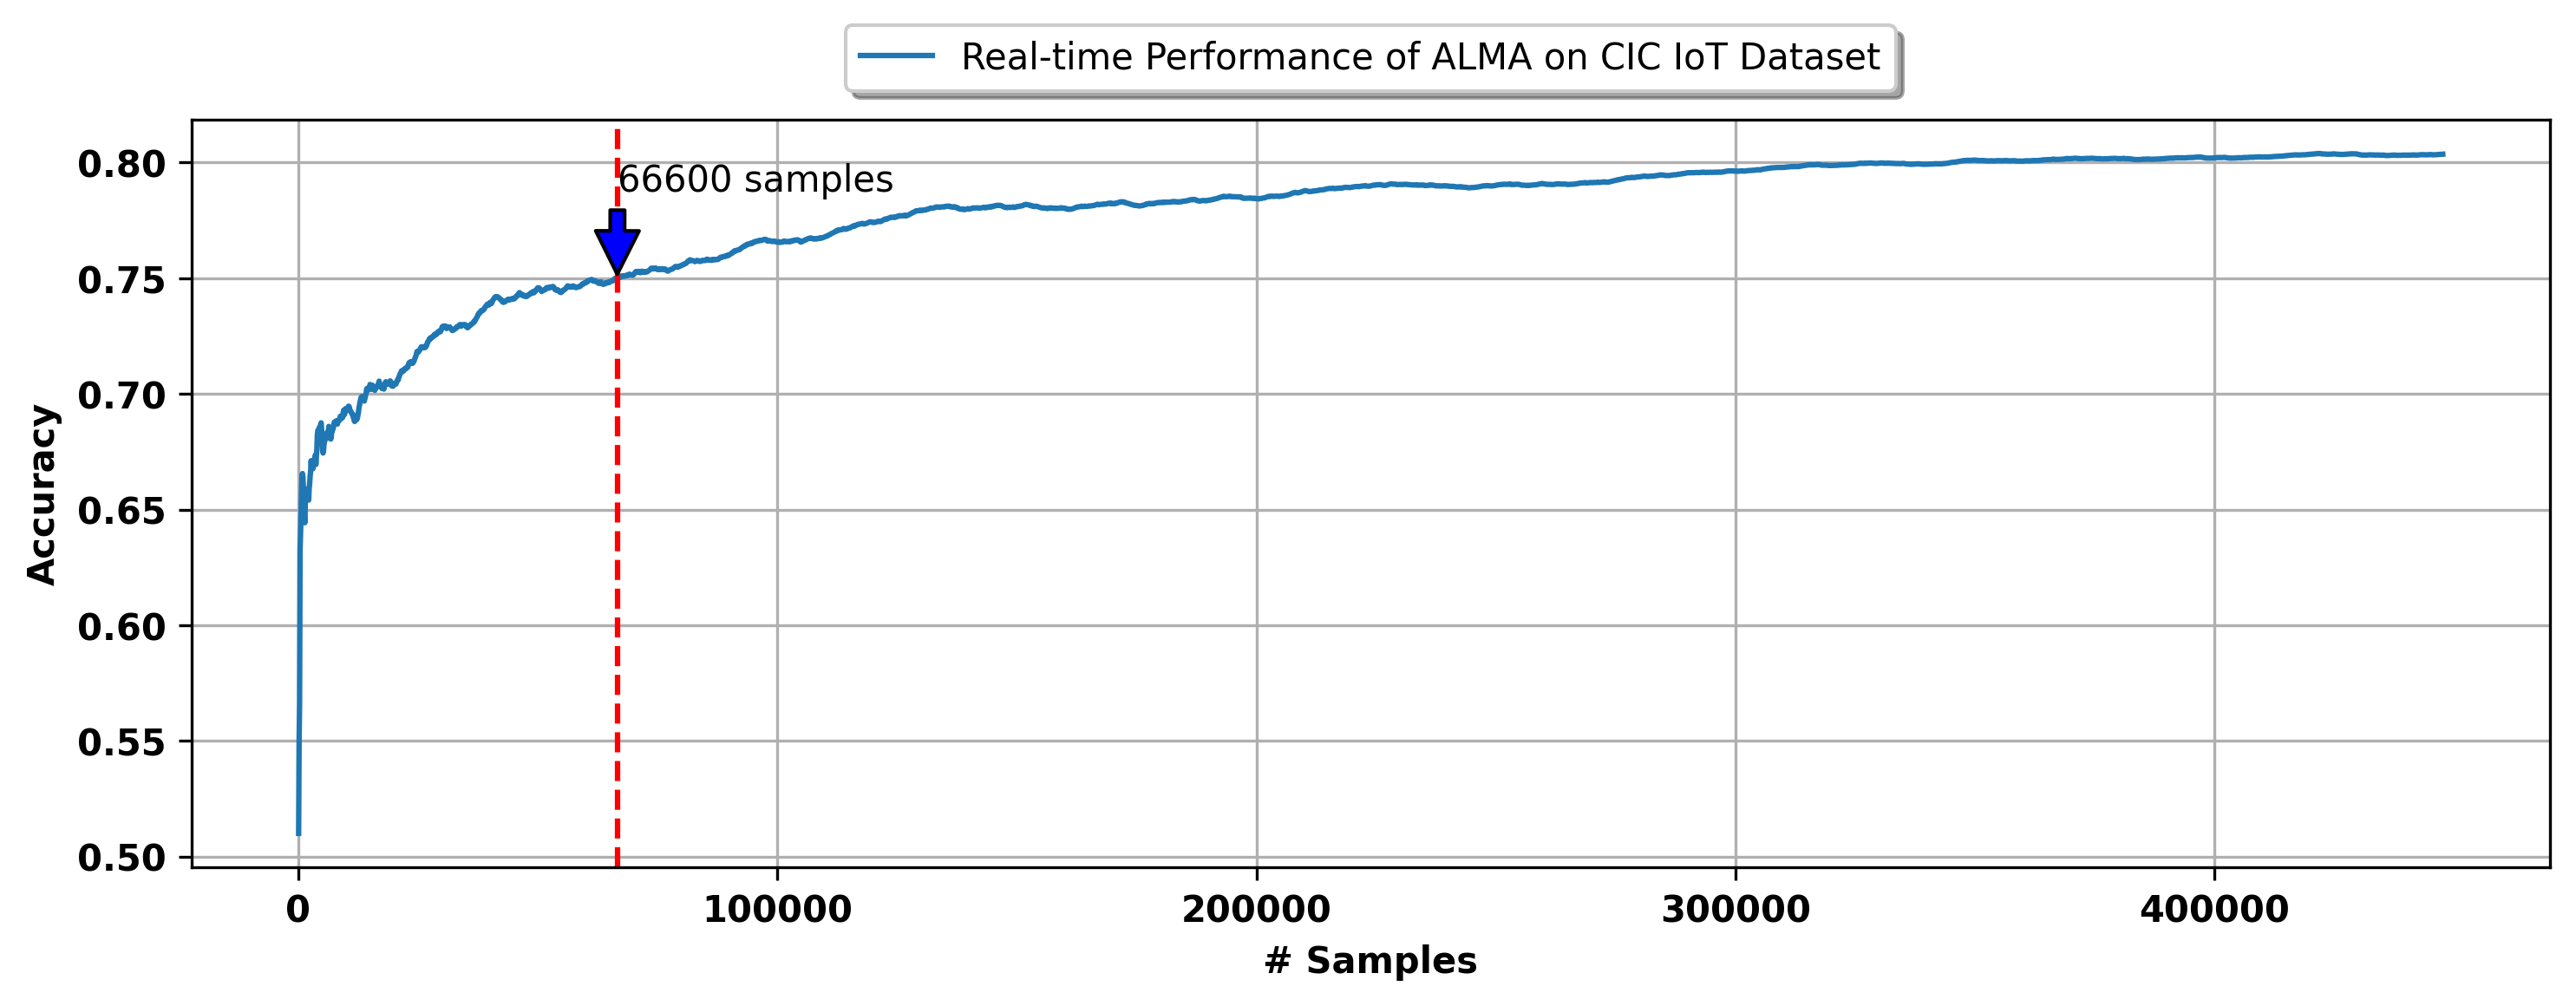

In [119]:
plot_performance(
    dataset,
    metrics.Accuracy(),
    {
        "Real-time Performance of ALMA on CIC IoT Dataset": (
            preprocessing.StandardScaler() |ln.ALMAClassifier(alpha=0.1, B=4.6)
        )
    }
)